In [2]:
install.packages("wbstats")
library(wbstats)

Installing package into '/home/nbuser/R'
(as 'lib' is unspecified)


In [14]:
oil_data <- wb(indicator = c("CRUDE_DUBAI", "CRUDE_BRENT", "CRUDE_WTI", "COAL_SAFRICA","COAL_COL","COAL_AUS","GOLD"),
               startdate = "2006M06", enddate = "2017M11", freq = "M", POSIXct = TRUE)

In [15]:
head(oil_data,2)

iso3c,date,value,indicatorID,indicator,iso2c,country,date_ct,granularity
WLD,2017M10,55.58,CRUDE_DUBAI,"Crude oil, Dubai, $/bbl, nominal$",1W,World,2017-10-01,monthly
WLD,2017M09,53.86,CRUDE_DUBAI,"Crude oil, Dubai, $/bbl, nominal$",1W,World,2017-09-01,monthly


In [16]:
library(reshape2)

In [17]:
emtia_tablo<-dcast(oil_data,date~indicatorID, value.var='value')

In [18]:
head(emtia_tablo,2)
tail(emtia_tablo,2)

date,COAL_AUS,COAL_COL,COAL_SAFRICA,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,GOLD
2006M06,52.375,54.25,52.375,68.85773,65.08091,70.93182,596.145
2006M07,52.750,53.05,51.680,73.89714,69.04905,74.40421,633.710


,date,COAL_AUS,COAL_COL,COAL_SAFRICA,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,GOLD
136,2017M09,96.86905,82.7400,85.68571,55.16,53.86,49.83,1314.07
137,2017M10,97.14091,84.0625,85.09955,57.62,55.58,51.56,1279.51


In [23]:
cor(emtia_tablo[130:137,c(2,3,4,5,6,7,8)], use =   "complete.obs")

,COAL_AUS,COAL_COL,COAL_SAFRICA,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,GOLD
COAL_AUS,1.0000000,0.88912596,0.9767807,0.6033076,0.5457090,0.34857079,0.7606240
COAL_COL,0.8891260,1.00000000,0.9357080,0.4186015,0.3298387,0.06405974,0.6419130
COAL_SAFRICA,0.9767807,0.93570798,1.0000000,0.4773274,0.4096605,0.19888366,0.7351937
CRUDE_BRENT,0.6033076,0.41860153,0.4773274,1.0000000,0.9936223,0.91801644,0.5616891
CRUDE_DUBAI,0.5457090,0.32983871,0.4096605,0.9936223,1.0000000,0.94512288,0.5569540
CRUDE_WTI,0.3485708,0.06405974,0.1988837,0.9180164,0.9451229,1.00000000,0.3326030
GOLD,0.7606240,0.64191302,0.7351937,0.5616891,0.5569540,0.33260299,1.0000000


In [37]:
aylik_emtia<-ts(emtia_tablo[,2:8],start = c(2006,06), frequency = 12)


In [59]:
tail(aylik_emtia,2)

         COAL_AUS COAL_COL COAL_SAFRICA CRUDE_BRENT CRUDE_DUBAI CRUDE_WTI
Sep 2017 96.86905  82.7400     85.68571       55.16       53.86     49.83
Oct 2017 97.14091  84.0625     85.09955       57.62       55.58     51.56
            GOLD
Sep 2017 1314.07
Oct 2017 1279.51

In [39]:
library(xts)

In [44]:
aylik_emtia<-as.xts(aylik_emtia)

In [45]:
model<-lm(data=aylik_emtia, CRUDE_BRENT~GOLD)
summary(model)


Call:
lm(formula = CRUDE_BRENT ~ GOLD, data = aylik_emtia)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.156 -22.676   5.007  16.826  63.927 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.018756   8.095688   4.202 4.78e-05 ***
GOLD         0.039464   0.006624   5.957 2.10e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24.05 on 135 degrees of freedom
Multiple R-squared:  0.2082,	Adjusted R-squared:  0.2023 
F-statistic: 35.49 on 1 and 135 DF,  p-value: 2.104e-08


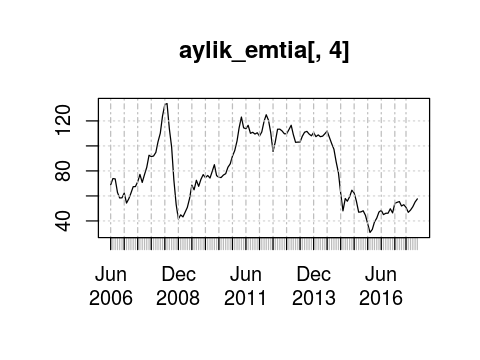

In [53]:
plot(aylik_emtia[,4])

In [46]:
library(forecast)

In [62]:
fe<-ets(aylik_emtia[,4])
plot(forecast(fe,h=20))

ERROR: Error in ts(coredata(x), frequency = frequency(x), ...): 'ts' object must have one or more observations


In [58]:
forecast(fit_emtia,h=20)

       Point Forecast      Lo 80     Hi 80      Lo 95     Hi 95
Jun 12       59.48776  51.744618  67.23091  47.645644  71.32988
Jul 12       60.98200  44.871570  77.09242  36.343226  85.62077
Aug 12       62.17738  39.189608  85.16516  27.020615  97.33415
Sep 12       63.13369  33.804630  92.46276  18.278762 107.98863
Oct 12       63.89874  28.585972  99.21151   9.892521 117.90496
Nov 12       64.51078  23.512454 105.50911   1.809251 127.21231
Dec 12       65.00041  18.585561 111.41526  -5.984976 135.98580
Jan 13       65.39212  13.809730 116.97450 -13.496336 144.28057
Feb 13       65.70548   9.187458 122.22350 -20.731375 152.14233
Mar 13       65.95617   4.718494 127.19385 -27.698773 159.61111
Apr 13       66.15672   0.400178 131.91327 -34.409234 166.72268
May 13       66.31717  -3.771961 136.40629 -40.874904 173.50923
Jun 13       66.44552  -7.803626 140.69466 -47.108749 179.99979
Jul 13       66.54820 -11.701277 144.79768 -53.124049 186.22045
Aug 13       66.63035 -15.471768 148.732

Warning message in plot.xts(aylik_emtia):
"only the univariate series will be plotted"

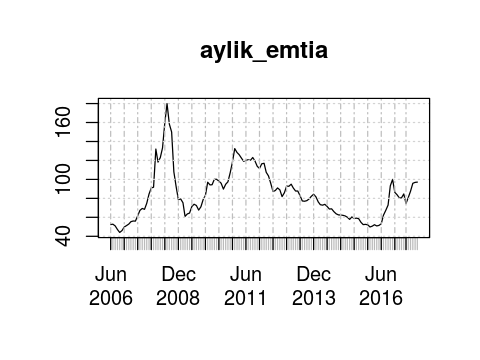

In [51]:
plot(aylik_emtia)

In [13]:
# Make sure data.table is installed
if(!'data.table' %in% installed.packages()[,1]) install.packages('data.table')
 
# Function to fetch google stock data
google_stocks <- function(sym, current = TRUE, sy = 2005, sm = 1, sd = 1, ey, em, ed)
{
  # sy, sm, sd, ey, em, ed correspond to
  # start year, start month, start day, end year, end month, and end day
 
  # If TRUE, use the date as the enddate
  if(current){
    system_time <- as.character(Sys.time())
    ey <- as.numeric(substr(system_time, start = 1, stop = 4))
    em <- as.numeric(substr(system_time, start = 6, stop = 7))
    ed <- as.numeric(substr(system_time, start = 9, stop = 10))
  }
   
  require(data.table)
   
  # Fetch data from google
  google_out = tryCatch(
    suppressWarnings(
      fread(paste0("http://www.google.com/finance/historical",
                   "?q=", sym,
                   "&startdate=", paste(sm, sd, sy, sep = "+"),
                   "&enddate=", paste(em, ed, ey, sep = "+"),
                   "&output=csv"), sep = ",")),
    error = function(e) NULL
  )
   
  # If successful, rename first column
  if(!is.null(google_out)){
    names(google_out)[1] = "Date"
  }
   
  return(google_out)
}
 
# Test it out
apple_data = google_stocks('AAPL')

Loading required package: data.table

Attaching package: 'data.table'

The following object is masked from 'package:xts':

    last



In [14]:
# enter https://finance.yahoo.com/quote/AAPL/history?p=AAPL
# right click download data and compy link
# https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1513110820&period2=1515789220&interval=1d&events=history&
# crumb=SUAHEzxDtrE

In [16]:
google_stocks('AAPL')

NULL